# FASHION MNIST

### Imports

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from keras.datasets import fashion_mnist

from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Dense 

from sklearn.metrics import confusion_matrix

## Constants

In [14]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
FLATTENED_IMG_DIM = IMG_HEIGHT * IMG_WIDTH
TRAIN_IMGS_COUNT = 60000
TEST_IMGS_COUNT = 10000

### Data Import 

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### EDA 

In [11]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train[[0]].shape

(1, 28, 28)

In [55]:
x_1 = x_train[[0]].reshape(1, 28*28)

In [59]:
len(x_1[0])

784

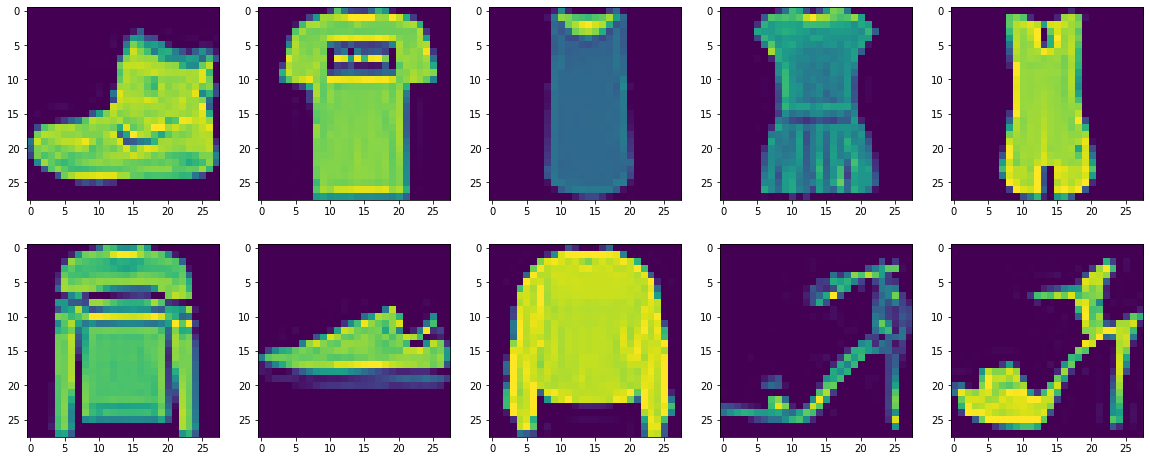

In [53]:
plt.figure(figsize=[20,8])

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[[i]][0])
#     plt.show()

## Flatten the Dataset

In [10]:
dataset_flattened = pd.DataFrame(x_train.reshape(len(x_train), 28*28))

In [11]:
dataset_flattened.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dataset_flattened.shape

(60000, 784)

In [15]:
x_test.shape

(10000, 28, 28)

In [83]:
X_train = (x_train.reshape(TRAIN_IMGS_COUNT, FLATTENED_IMG_DIM))/255
X_test = (x_test.reshape(TEST_IMGS_COUNT, FLATTENED_IMG_DIM))/255

In [25]:
X_toy = X_train[:500]
y_toy = y_train[:500]

In [29]:
X_toy = X_toy/255

In [34]:
X_toy.shape

(500, 784)

In [35]:
y_toy.shape

(500,)

## Model Building

## Artificial Neural Network

In [129]:
ann = Sequential()
ann.add(Dense(784, activation='relu', input_shape=(784,), name='layer_1'))
ann.add(Dense(128, activation='relu', name='layer_2'))
ann.add(Dense(64, activation='relu', name='layer_3'))
ann.add(Dense(10, activation='softmax', name='output'))

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [130]:
ann.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
layer_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
layer_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 724,826
Trainable params: 724,826
Non-trainable params: 0
_________________________________________________________________


In [131]:
%%time
ann.fit(x=X_train, y=y_train, batch_size=100, epochs=80)

Epoch 1/80
600/600 [==============================] - 4s 7ms/step - loss: 0.4890 - accuracy: 0.8254
Epoch 2/80
600/600 [==============================] - 4s 6ms/step - loss: 0.3619 - accuracy: 0.8677
Epoch 3/80
600/600 [==============================] - 4s 6ms/step - loss: 0.3252 - accuracy: 0.8809
Epoch 4/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2982 - accuracy: 0.8895
Epoch 5/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2812 - accuracy: 0.8953
Epoch 6/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2677 - accuracy: 0.8992
Epoch 7/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2546 - accuracy: 0.9037
Epoch 8/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2439 - accuracy: 0.9088
Epoch 9/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2364 - accuracy: 0.9111
Epoch 10/80
600/600 [==============================] - 4s 7ms/step - loss: 0.2260 - accuracy: 0.9140

In [108]:
preds = ann.predict(x=(X_test[1000].reshape(1, 784))/255)
print("Predicted Class is : ", preds[0].argmax())
print("Actual Class is : " , y_test[1000])

Predicted Class is :  5
Actual Class is :  0


In [91]:
X_train.shape

(60000, 784)

In [135]:
y_pred = ann.predict_classes(x=X_test)

In [100]:
type(y_pred)

numpy.ndarray

In [132]:
score = ann.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7255288362503052
Test accuracy: 0.8903999924659729


In [136]:
confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[831,   1,  11,  26,   3,   3, 122,   0,   3,   0],
       [  1, 982,   2,   7,   3,   0,   4,   0,   1,   0],
       [ 32,   1, 779,   9,  86,   0,  93,   0,   0,   0],
       [ 28,  16,   8, 881,  34,   0,  31,   0,   2,   0],
       [  2,   1,  81,  23, 810,   0,  81,   0,   2,   0],
       [  0,   0,   0,   0,   0, 980,   0,   7,   0,  13],
       [ 99,   0,  55,  22,  55,   0, 766,   0,   3,   0],
       [  0,   0,   0,   0,   0,  14,   0, 954,   0,  32],
       [ 12,   0,   1,   2,   4,   6,  17,   3, 955,   0],
       [  1,   0,   0,   0,   0,   5,   0,  28,   0, 966]])

In [138]:
result = pd.DataFrame({'Y_TRUE': y_test, 'Y_PRED': y_pred}, columns=['Y_TRUE', 'Y_PRED'])

In [139]:
result.head()

,Y_TRUE,Y_PRED
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [140]:
wrong = result[result.Y_PRED != result.Y_TRUE]

In [141]:
wrong.shape

(1096, 2)

In [142]:
(10000 - 1109)/10000

0.8891